In [8]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

N = 10
beta = 1
L = 1
k,l = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))
t_vals = np.linspace(0,100,100)

def F(k,l):
    K = np.sqrt(k**2 + l**2)
    return K**2 * np.exp(-(l*k)**2)

def omega(k, l):
    return -beta * k / (k**2 + l**2 + L**-2)

F_vals = F(k,l)
f = np.empty((len(t_vals), N, N))
#f = np.sum(axis=)

phi = np.random.uniform(-2*np.pi, 2*np.pi, size=(N,N))
#phi = 0
for i,t in enumerate(t_vals):
    F_t = F_vals * np.exp(1j * omega(k, l) * t + phi)
    f_t = np.real(np.fft.ifft2(F_t))
    f[i] = f_t


<IPython.core.display.Javascript object>


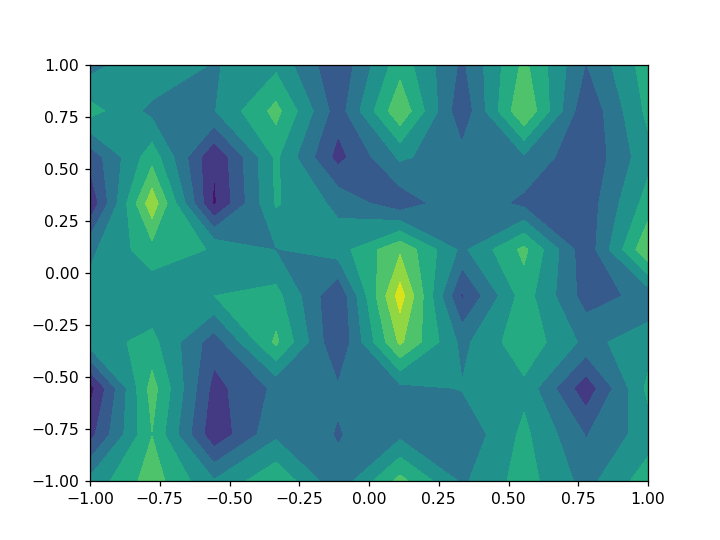

In [9]:
fig, ax = plt.subplots()
def animate(i):
    ax.clear()
    ax.contourf(x,y,f[i])
    
ani = animation.FuncAnimation(fig, animate, len(t_vals), interval=50, blit=False,repeat=True)
#ani.save('norandomphase.mp4')
plt.show()

<IPython.core.display.Javascript object>


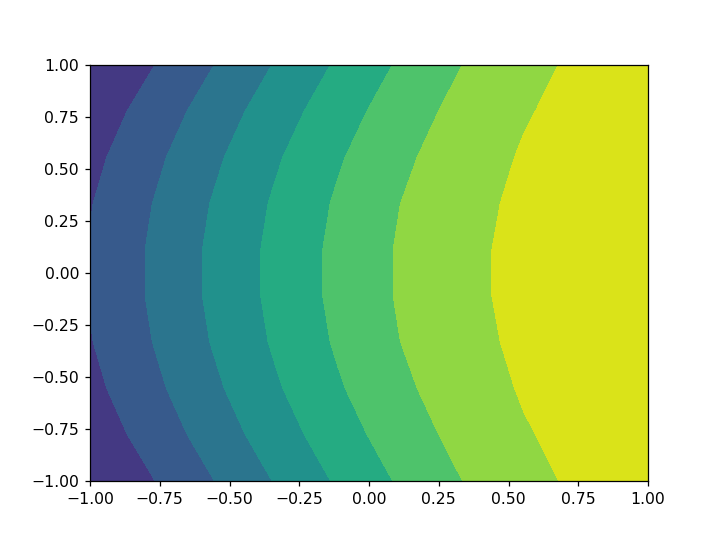

array([[36.08871027, 40.67108787, 43.87261399, 45.75288661, 47.62042828,
        47.01782568, 46.35749121, 43.27201339, 40.27769447, 35.08871027],
       [40.27969647, 44.69031983, 49.24389937, 51.34922612, 53.34645638,
        52.73384377, 51.96384073, 48.63328876, 45.30693645, 39.67108787],
       [43.89063201, 48.63328876, 53.46467401, 55.74402283, 57.84495772,
        57.22233509, 56.36864746, 52.84405339, 49.25991538, 43.27201339],
       [46.38151524, 51.34922612, 56.37465346, 58.77045803, 60.9457884 ,
        60.31315576, 59.40509267, 55.74402283, 51.98586276, 45.75288661],
       [47.65646432, 52.73384377, 57.86297573, 60.31315576, 62.5312754 ,
        61.88863276, 60.95780041, 57.22233509, 53.38049041, 47.01782568],
       [47.66647433, 52.73384377, 57.87298574, 60.31315576, 62.54128541,
        61.88863276, 60.96781042, 57.22233509, 53.39050042, 47.01782568],
       [46.41154527, 51.34922612, 56.40468349, 58.77045803, 60.97581843,
        60.31315576, 59.43396763, 55.74402283

In [10]:
N=10
phi = 0
waves = [(i,j) for i in np.linspace(-1,1,N) for j in np.linspace(-1,1,N)]

x,y = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))
f = np.empty((len(t_vals),N,N))
for w in waves:
    k,l = w
    F_val = F(k,l)
    for i,t in enumerate(t_vals):
        f[i] += np.real(F_val * np.exp(1j*(k*x+l*y))*np.exp(1j*omega(k,l)*t+phi))

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.contourf(x,y,f[i])
ani = animation.FuncAnimation(fig, animate, len(t_vals), interval=50, blit=False,repeat=True)
#ani.save('sum.mp4')
plt.show()

f[0]



In [11]:
x,y = np.linspace(-1,1,N),np.linspace(-1,1,N)
t_vals = np.linspace(0,100,100)
k,l = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))

F_vals = F(k,l)
phi = np.random.uniform(-2*np.pi, 2*np.pi, size=(N,N))
omega_vals = omega(k,l)


exp_term1 = np.exp(1j * (k[np.newaxis, :, :] * x + l[np.newaxis, :, :] * y))
exp_term2 = np.exp(1j * (omega_vals[np.newaxis, :, :] * t_vals[:, np.newaxis, np.newaxis] + phi[np.newaxis, :, :]))
function_vals = F_vals[k,l, np.newaxis, np.newaxis] * exp_term1 * exp_term2

result = np.sum(function_vals, axis=(1, 2))

result.shape


IndexError: arrays used as indices must be of integer (or boolean) type

<IPython.core.display.Javascript object>


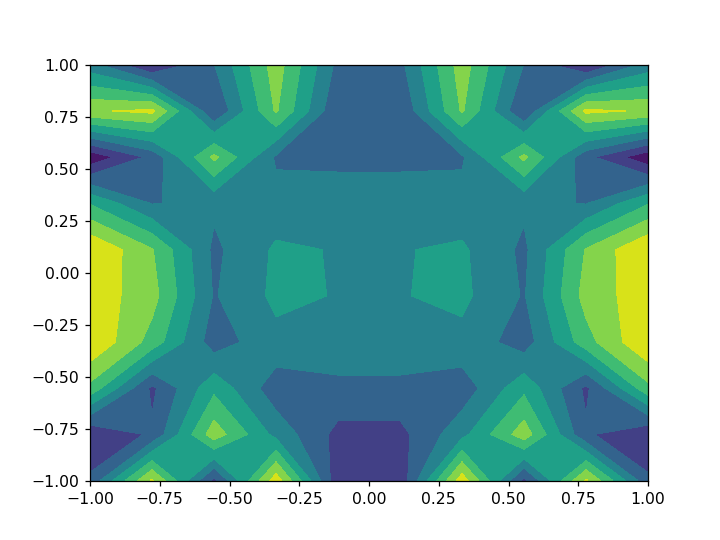

array([[-0.30618373,  0.01335756,  0.42641798,  0.78138091,  0.97533636,
         0.97533636,  0.78138091,  0.42641798,  0.01335756, -0.30618373],
       [ 0.01335756,  0.29631355,  0.49212142,  0.58149865,  0.60356216,
         0.60356216,  0.58149865,  0.49212142,  0.29631355,  0.01335756],
       [ 0.42641798,  0.49212142,  0.45762884,  0.37809976,  0.31733311,
         0.31733311,  0.37809976,  0.45762884,  0.49212142,  0.42641798],
       [ 0.78138091,  0.58149865,  0.37809976,  0.21409823,  0.12294947,
         0.12294947,  0.21409823,  0.37809976,  0.58149865,  0.78138091],
       [ 0.97533636,  0.60356216,  0.31733311,  0.12294947,  0.02468007,
         0.02468007,  0.12294947,  0.31733311,  0.60356216,  0.97533636],
       [ 0.97533636,  0.60356216,  0.31733311,  0.12294947,  0.02468007,
         0.02468007,  0.12294947,  0.31733311,  0.60356216,  0.97533636],
       [ 0.78138091,  0.58149865,  0.37809976,  0.21409823,  0.12294947,
         0.12294947,  0.21409823,  0.37809976

In [16]:
N = 10
t,x,y = np.meshgrid(np.linspace(0,100,100),np.linspace(-1,1,N),np.linspace(-1,1,N),indexing='ij')
k,l = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))
F_vals = F(k,l)
phi = np.random.uniform(-2*np.pi, 2*np.pi, size=(N,N))
phi= np.zeros((N,N))
omega_vals = omega(k,l)

function_vals = F_vals[np.newaxis,np.newaxis,np.newaxis,:,:] * np.exp(1j*(k*x[np.newaxis,np.newaxis,:,:,:]+l*y[np.newaxis,np.newaxis,:,:,:]))*np.exp(1j*omega_vals[np.newaxis,np.newaxis,np.newaxis,:,:]*t[np.newaxis,np.newaxis,:,:,:]+phi[np.newaxis,np.newaxis,np.newaxis,:,:])

f = np.real(np.sum(function_vals, axis=(0, 1)))

fig, ax = plt.subplots()

x,y = np.linspace(-1,1,N),np.linspace(-1,1,N)
def animate(i):
    ax.clear()
    ax.contourf(x,y,f[i])
ani = animation.FuncAnimation(fig, animate, len(t_vals), interval=50, blit=False,repeat=True)
#ani.save('sum.mp4')
plt.show()

f[0]
